#Learning Word Embeddings with the Embedding layer. 

Libro de F. Chollet, pp. 185 - 187. 

In [0]:
from keras.layers import Embedding
from keras.datasets import imdb  # base de datos con evaluación de películas.
from keras import preprocessing

from keras.models import Sequential
from keras.layers import Flatten, Dense

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import load_model

De la documentación de Keras: Embedding layer: Turns positive integers (indexes) into dense vectors of fixed size.

Instantiating an Embedding layer:

In [0]:
embedding_layer = Embedding(1000, 64)

En este ejemplo consideraremos la base de datos IMDB.

Nos restringimos a las max_features=10,000 palabras más comunes.

Consideraremos únicamente las primeras maxlen=20 palabras de cada reseña.

La red aprenderá vectores continuos (word embeddings) de dimensión 8.

In [0]:
num_words = 10000
maxlen = 20

In [0]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

Observemos que las reseñas de estos datos de IMDB ya están indexadas.

In [0]:
print(x_train[0])

Veamos que esta reseña fue positiva:

In [0]:
print(y_train[0])

Podemos recuperar el texto original de este texto indexado en dado caso, para leer la reseña, pero para el análisisi obviamente no lo rquerimos. Por ejemplo, para obtener el text de la primer reseña:

In [0]:
idx = imdb.get_word_index()
reverse_idx = dict([(value, key) for (key, value) in idx.items()]) 
decoded = " ".join( [reverse_idx.get(i - 3, "#") for i in x_train[0]] )
print(decoded) 

In [0]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [0]:
decoded = " ".join( [reverse_idx.get(i - 3, "#") for i in x_train[0]] )
print(decoded) 

Definimos el modelo, es decir, nuestra red neuronal con la embedding layer para encontrar sus pesos.

Como en este ejemplo queremos predecir si la reseña es positiva o negativa, usamo la función sigmoide en la capa de salida.

Recordemos: Diccionario de 10,000 palabras, con secuencias de 20 palabras cada reseña y salida en un vector real continuo de 8 dimensiones.

In [0]:
model = Sequential()
model.add( Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add( Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
n_epochs = 10
n_batch = 32

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Observa que no se requiere estrictamente usar los datos de prueba para generar los Embeddings. Sin embargo también incluyo esa opción para validar nuestro resultado:

In [0]:
H = model.fit(x_train, y_train,
              epochs=n_epochs,
              batch_size=n_batch,
              validation_split=0.2)


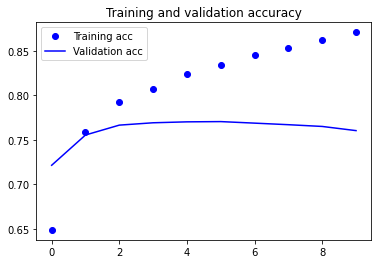

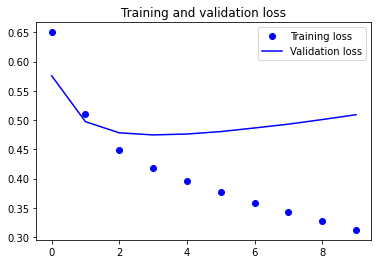

In [0]:
import matplotlib.pyplot as plt

acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Lo que sigue solamente aplica si usaste los datos de Prueba durante el entrenamiento:

Salvamos el model con los Embeddings:

In [0]:
model.save("miEmbedding.h5")

Posteriormente lo podemos recuperar y cargar únicamente los pesos de los embeddings:

In [0]:
mymodel = load_model("/content/miEmbedding.h5")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
